In [63]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 220.2 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.4 MB 220.2 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.4 MB 273.8 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 273.8 kB/s eta 0:00:05
   ---- ----------------------------------- 0.1/1.4 MB 449.7 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 593.2 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 840.2 kB/s eta 0:00:02
   ------------------ --------------------- 0.6


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Import & Exploration

In [40]:
#Load datasets
v1 = pd.read_csv('V1.csv', encoding='latin1')
v2 = pd.read_csv('V2.csv', encoding='latin1')

In [41]:
v1.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,...,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,...,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,...,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,...,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,...,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,...,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,...,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,...,88.543663,183.513779,2,116587.500000,8,8,6,6,8,1
8,1,28,9,2800,2.5,0,0,0,0,114000,...,88.543663,229.392223,2,116312.000000,8,8,6,6,8,1
9,1,28,10,2800,1.0,0,0,0,0,360000,...,88.543663,91.756889,2,398000.000000,10,10,10,10,10,1


In [42]:
v2.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,...,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,...,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,...,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,...,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,...,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,...,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,...,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,...,88.543663,183.513779,2,116587.500000,8,8,6,6,8,1
8,1,28,9,2800,2.5,0,0,0,0,114000,...,88.543663,229.392223,2,116312.000000,8,8,6,6,8,1
9,1,28,10,2800,1.0,0,0,0,0,360000,...,88.543663,91.756889,2,398000.000000,10,10,10,10,10,1


In [43]:
df = pd.concat([v1, v2], axis=0)

In [45]:
df.shape

(326536, 90)

In [47]:
df.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [49]:
df.dtypes

W_REGN          int64
W_PROV          int64
SEQ_NO          int64
RPROV           int64
FSIZE         float64
               ...   
RPCINC          int64
PRPCINC         int64
PPCINC          int64
RPCINC_NIR      int64
W_REGN_NIR      int64
Length: 90, dtype: object

In [53]:
df.isnull().sum()
print("\nTotal missing values:", df.isnull().sum().sum())


Total missing values: 0


In [55]:
df.duplicated().sum()

163268

## 2. Identifying Data and Attributes

In [28]:
column_names = df.columns
data_types = df.dtypes

# Column descriptions mapping
description_mapping = {
    "W_REGN": "Region",
    "W_PROV": "Province",
    "SEQ_NO": "Household ID",
    "RPROV": "Province Recode (Province with Highly Urbanized City (HUC) code)",
    "FSIZE": "Average Family Size",
    "REG_SAL": "Salaries/Wages from Regular Employment",
    "SEASON_SAL": "Salaries/Wages from Seasonal Employment",
    "WAGES": "Salaries/Wages",
    "NETSHARE": "Net Share of Crops, Fruits, etc. (Total Net Value of Share)",
    "CASH_ABROAD": "Cash Receipts, Support, etc. from Abroad",
    "CASH_DOMESTIC": "Cash Receipts, Support, etc. from Domestic Source",
    "RENTALS_REC": "Rentals Received from Non-Agricultural Lands, etc.",
    "INTEREST": "Interest Income",
    "PENSION": "Pension and Retirement Benefits",
    "DIVIDENDS": "Dividends from Investment",
    "OTHER_SOURCE": "Other Sources of Income Not Elsewhere Classified (NEC)",
    "NET_RECEIPT": "Family Sustenance Activities",
    "REGFT": "Total Received as Gifts",
    "NET_CFG": "Crop Farming and Gardening Income",
    "NET_LPR": "Livestock and Poultry Raising Income",
    "NET_FISH": "Fishing Income",
    "NET_FOR": "Forestry and Hunting Income",
    "NET_RET": "Wholesale and Retail Income",
    "NET_MFG": "Manufacturing Income",
    "NET_TRANS": "Transportation, Storage Services Income",
    "NET_NEC_A8": "Entrepreneurial Activities Not Elsewhere Classified (NEC)",
    "NET_NEC_A9": "Entrepreneurial Activities NEC",
    "NET_NEC_A10": "Entrepreneurial Activities NEC",
    "EAINC": "Total Income from Entrepreneurial Activities",
    "LOSSES": "Losses from Entrepreneurial Activities",
    "BREAD": "Bread and Cereals Expenditure",
    "MEAT": "Meat Expenditure",
    "FISH": "Fish and Seafood Expenditure",
    "MILK": "Milk, Cheese, and Eggs Expenditure",
    "OIL": "Oils and Fats Expenditure",
    "FRUIT": "Fruit Expenditure",
    "VEG": "Vegetables Expenditure",
    "SUGAR": "Sugar, Jam, Honey, Chocolate, and Confectionery Expenditure",
    "FOOD_NEC": "Food Products Not Elsewhere Classified",
    "FRUIT_VEG": "Fruit and Vegetable Juices Expenditure",
    "COFFEE": "Coffee Expenditure",
    "TEA": "Tea Expenditure",
    "COCOA": "Cocoa Drinks Expenditure",
    "WATER": "Mineral Water Expenditure",
    "SOFTDRINKS": "Soft Drinks Expenditure",
    "OTHER_NON_ALCOHOL": "Other Non-Alcoholic Beverages Expenditure",
    "ALCOHOL": "Alcoholic Beverages Expenditure",
    "TOBACCO": "Tobacco Expenditure",
    "OTHER_VEG": "Other Vegetable-Based Products Expenditure",
    "SERVICES_PRIMARY_GOODS": "Services Related to Primary Goods",
    "ALCOHOL_PROCDUCTION_SERVICES": "Alcohol Production Services",
    "FOOD_HOME": "Total Food Consumed at Home",
    "FOOD_OUTSIDE": "Total Food Expenditures Outside the Home",
    "FOOD": "Total Food Expenditure",
    "CLOTH": "Clothing and Footwear Expenditure",
    "HOUSING_WATER": "Housing, Water, Electricity, Gas, and Other Fuels Expenditure",
    "ACTRENT": "Actual House Rent Paid",
    "IMPUTED_RENT": "Imputed House Rental Value",
    "BIMPUTED_RENT": "Imputed Housing Benefit Rental Value",
    "RENTVAL": "House Rent/Rental Value",
    "FURNISHING": "Furnishings and Routine Household Maintenance",
    "HEALTH": "Health Expenditure",
    "TRANSPORT": "Transport Expenditure",
    "COMMUNICATION": "Communication Expenditure",
    "RECREATION": "Recreation and Culture Expenditure",
    "EDUCATION": "Education Expenditure",
    "INSURANCE": "Insurance Expenditure",
    "MISCELLANEOUS": "Miscellaneous Goods and Services Expenditure",
    "DURABLE": "Durable Furniture and Equipment Expenditure",
    "OCCASION": "Special Family Occasion Expenditure",
    "OTHER_EXPENDITURE": "Other Expenditures (including Value Consumed and Losses)",
    "OTHER_DISBURSEMENT": "Other Disbursement",
    "FOOD_ACCOM_SRVC": "Food Consumed Outside Home - Accommodation Services",
    "NFOOD": "Total Non-Food Expenditure",
    "TOINC": "Total Income",
    "TOTEX": "Total Expenditure",
    "TOTDIS": "Total Disbursements",
    "OTHREC": "Total Other Receipts",
    "TOREC": "Total Receipts",
    "RPSU": "PSU (Recode)",
    "RFACT": "Household Weight",
    "MEM_RFACT": "Population Weight",
    "URB": "Urban / Rural Classification",
    "PERCAPITA": "Per Capita Income",
    "NPCINC": "Per Capita Income Decile (National)",
    "RPCINC": "Per Capita Income Decile (Region)",
    "PRPCINC": "Per Capita Income Decile (Province)",
    "PPCINC": "Per Capita Income Decile (Province and HUC)",
    "RPCINC_NIR": "Per Capita Income Decile (Region with Negros Island Region (NIR))",
    "W_REGN_NIR": "Region (with NIR)",
}


descriptions = [description_mapping.get(col, "No description available") for col in column_names]

df_dictionary = pd.DataFrame({
    "Column Name": column_names,
    "Data Type": data_types,
    "Description": descriptions
})

df_dictionary.head(90)

In [61]:
## ANONG MGA TATANGGALIN NA COLUMNS?

## 3. Determining the Dataset
Define dataset type:
Transactional → Focuses on purchases & spending patterns.
Demographic → Includes income, urban/rural status, wages, etc.
Identify target problem (association rule mining → market basket analysis).

## 4. Data Quality Assesment

In [56]:
df.duplicated().sum()  # Count duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicates

<Axes: xlabel='WAGES'>

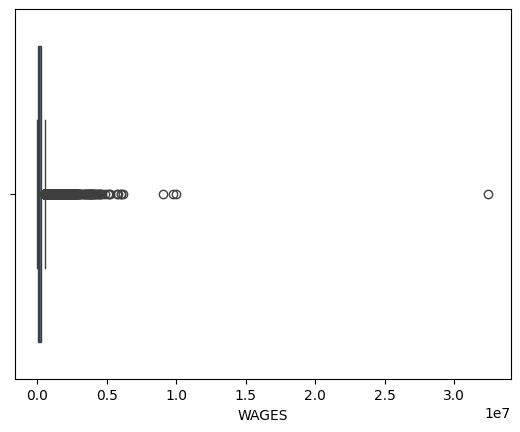

In [57]:
sns.boxplot(x=df['WAGES'])

In [58]:
df.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,...,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.600209,45.721427,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,...,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,5.143726,24.820490,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,...,163.523039,783.888869,0.499407,1.585432e+05,2.900291,2.889129,2.873970,2.873305,2.891100,4.957659
min,1.000000,1.000000,1.000000,100.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.019379,0.915853,1.000000,5.240000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,24.000000,40817.750000,2402.000000,3.000000,0.000000e+00,0.000000e+00,2.808000e+04,0.000000e+00,0.000000e+00,...,70.603244,231.964388,1.000000,4.226207e+04,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000
50%,10.000000,46.000000,81634.500000,4600.000000,4.000000,7.200000e+04,0.000000e+00,1.170000e+05,0.000000e+00,0.000000e+00,...,114.635185,444.956711,2.000000,6.552517e+04,5.000000,5.000000,6.000000,5.000000,5.000000,10.000000
75%,13.000000,70.000000,122451.250000,7000.000000,5.000000,2.022000e+05,4.257250e+04,2.330100e+05,0.000000e+00,2.000000e+03,...,192.454697,817.498617,2.000000,1.094002e+05,8.000000,8.000000,8.000000,8.000000,8.000000,14.000000
max,19.000000,99.000000,163268.000000,9900.000000,23.500000,1.547640e+07,1.700000e+07,3.247640e+07,1.200000e+06,4.500000e+06,...,3539.150635,16137.332520,2.000000,4.123060e+07,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


In [59]:
df.corr()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,...,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
W_REGN,1.000000,0.187548,0.983369,0.187458,0.040622,-0.029712,-0.034464,-0.037937,0.003361,-0.094219,...,-0.337244,-0.270219,-0.060498,-0.029689,-0.117964,-0.024999,-0.006124,0.004267,-0.023841,0.896951
W_PROV,0.187548,1.000000,0.220914,0.999996,-0.001162,0.071282,-0.034975,0.058453,-0.010895,-0.020385,...,-0.143284,-0.118613,-0.159859,0.030552,0.042779,-0.032864,-0.000746,0.000939,-0.024311,0.194175
SEQ_NO,0.983369,0.220914,1.000000,0.220851,0.028557,-0.011142,-0.031039,-0.019239,0.001619,-0.091098,...,-0.349136,-0.288033,-0.069792,-0.018169,-0.090736,-0.025122,-0.006788,0.003997,-0.023244,0.914743
RPROV,0.187458,0.999996,0.220851,1.000000,-0.001118,0.071541,-0.035072,0.058674,-0.010968,-0.020362,...,-0.143633,-0.118924,-0.160591,0.030655,0.043065,-0.032540,-0.000460,0.000946,-0.024004,0.194052
FSIZE,0.040622,-0.001162,0.028557,-0.001118,1.000000,0.154568,0.144919,0.187840,0.008598,-0.021282,...,-0.016386,0.402410,0.007064,-0.198748,-0.421304,-0.449470,-0.464909,-0.472176,-0.449739,0.021493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPCINC,-0.024999,-0.032864,-0.025122,-0.032540,-0.449470,0.358812,-0.049925,0.329138,0.062085,0.220336,...,0.002186,-0.188005,-0.153641,0.405370,0.885829,1.000000,0.954166,0.935355,0.997366,-0.024165
PRPCINC,-0.006124,-0.000746,-0.006788,-0.000460,-0.464909,0.341433,-0.051801,0.312008,0.063162,0.209943,...,-0.022154,-0.213174,-0.139725,0.395063,0.859768,0.954166,1.000000,0.977129,0.955390,0.003343
PPCINC,0.004267,0.000939,0.003997,0.000946,-0.472176,0.328769,-0.050149,0.300361,0.068606,0.208403,...,0.007222,-0.189496,-0.094349,0.392135,0.843765,0.935355,0.977129,1.000000,0.936062,0.004366
RPCINC_NIR,-0.023841,-0.024311,-0.023244,-0.024004,-0.449739,0.358469,-0.049817,0.328840,0.061990,0.219915,...,0.003650,-0.186753,-0.155948,0.405201,0.884899,0.997366,0.955390,0.936062,1.000000,-0.007288


## Quantitative Assesments

- Compute summary statistics (mean, median, mode) for key attributes.
- Create visualizations:
1. Histograms → Distribution of wages, income, rent.
2. Boxplots → Identify outliers.
3. Correlation matrix → Find relationships between income & spending.
4. Bar charts → Compare spending by region

## 6. Application of Proximity

## 7. Data Mining: Association Rule Mining

In [70]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Example dataset with income and expenditures
df = pd.DataFrame({
    "Household": ["A", "B", "C", "D", "E"],
    "TOINC": [10000, 20000, 15000, 30000, 25000],  # Total income
    "BREAD": [2500, 4000, 3000, 7500, 6000],  # Bread expenditure
    "MEAT": [2500, 5000, 3500, 8000, 6200],  # Meat expenditure
    "FISH": [1000, 3000, 2000, 5000, 4200],  # Fish expenditure
    "VEG": [2000, 3500, 2500, 7000, 5600]  # Vegetables expenditure
})

# Step 1: Convert expenditures to percentage of income
for col in ["BREAD", "MEAT", "FISH", "VEG"]:
    df[col] = (df[col] / df["TOINC"]) * 100  # Convert to percentage

# Step 2: Define the threshold (e.g., around 25% ± 5% tolerance)
threshold = 25
tolerance = 5  # Allow variation (e.g., 20% to 30%)

# Step 3: Convert spending to binary (1 if within threshold, 0 otherwise)
for col in ["BREAD", "MEAT", "FISH", "VEG"]:
    df[col] = ((df[col] >= threshold - tolerance) & (df[col] <= threshold + tolerance)).astype(int)

# Drop income column
df_filtered = df.drop(columns=["TOINC"])

# Step 4: Apply Apriori Algorithm
frequent_itemsets = apriori(df_filtered.iloc[:, 1:], min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 5: Display strong associations
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

      antecedents    consequents  support  confidence  lift
0         (BREAD)         (MEAT)      1.0         1.0   1.0
1          (MEAT)        (BREAD)      1.0         1.0   1.0
2         (BREAD)          (VEG)      0.6         0.6   1.0
3           (VEG)        (BREAD)      0.6         1.0   1.0
4          (MEAT)          (VEG)      0.6         0.6   1.0
5           (VEG)         (MEAT)      0.6         1.0   1.0
6   (BREAD, MEAT)          (VEG)      0.6         0.6   1.0
7    (BREAD, VEG)         (MEAT)      0.6         1.0   1.0
8     (MEAT, VEG)        (BREAD)      0.6         1.0   1.0
9         (BREAD)    (MEAT, VEG)      0.6         0.6   1.0
10         (MEAT)   (BREAD, VEG)      0.6         0.6   1.0
11          (VEG)  (BREAD, MEAT)      0.6         1.0   1.0


C:\Users\tones\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tones\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
